In [167]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### virtual env

In [168]:
!which python

/Users/ziru/miniforge3/envs/gesture_input/bin/python


### Preprocessing

In [169]:
data_folder = Path("/Users/ziru/Documents/GitHub/CMIS_1/P2-gesture-interaction/data")

In [170]:
data = {}
# csv文件的名字作为gesture data label
for gesture_file in data_folder.glob("*.csv"):
    gesture_name = gesture_file.stem    
    data[gesture_name] = pd.read_csv(gesture_file)  

In [171]:
# gesture classes
data.keys()

dict_keys(['a', 't', 'f', 'p', 'd', 'o', 'x', 'y', 'n'])

In [172]:
# data["n"]
# print(type(data['n']))
# #  acc: linear acceleration of the device in 3D space
# # gyro: angular velocity of the device in 3D space

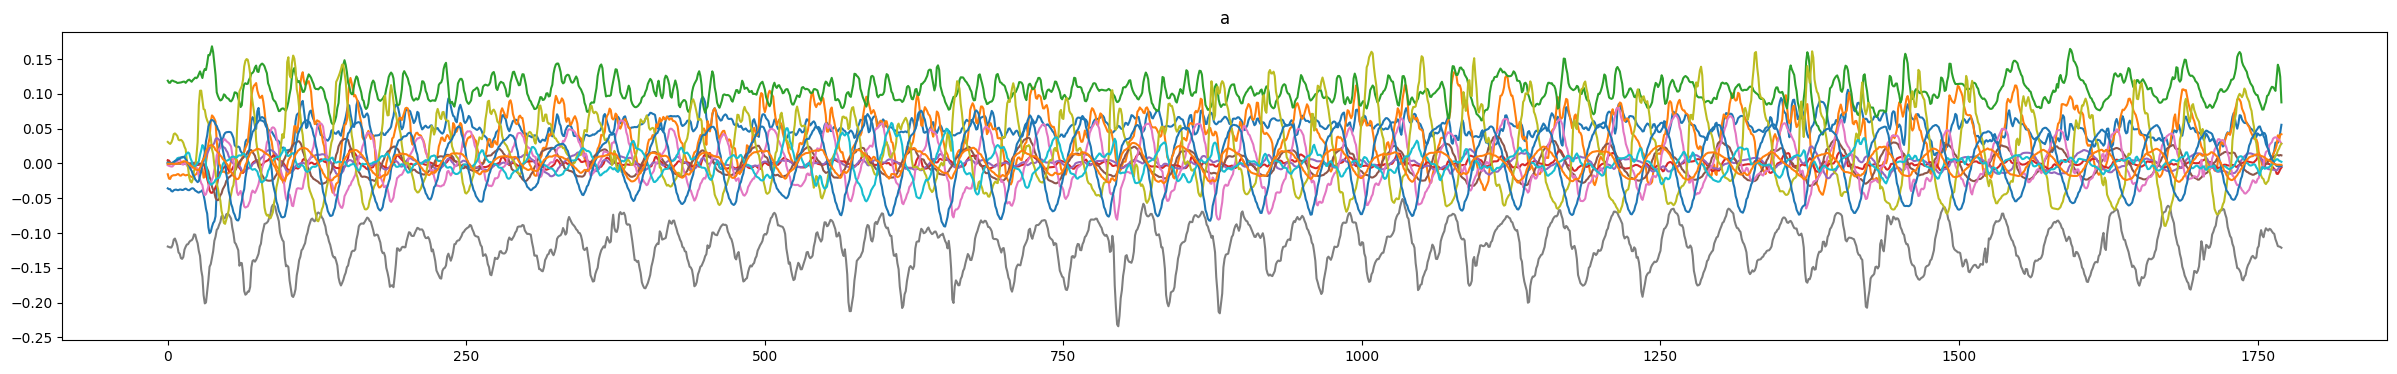

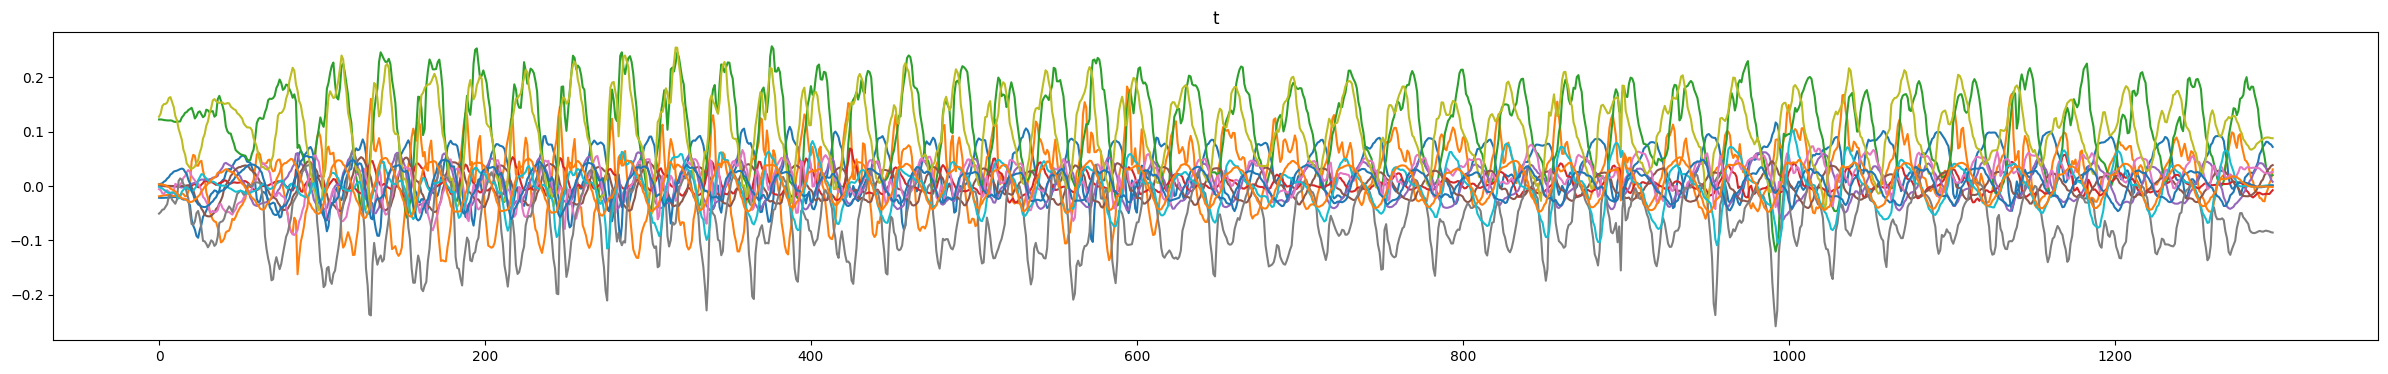

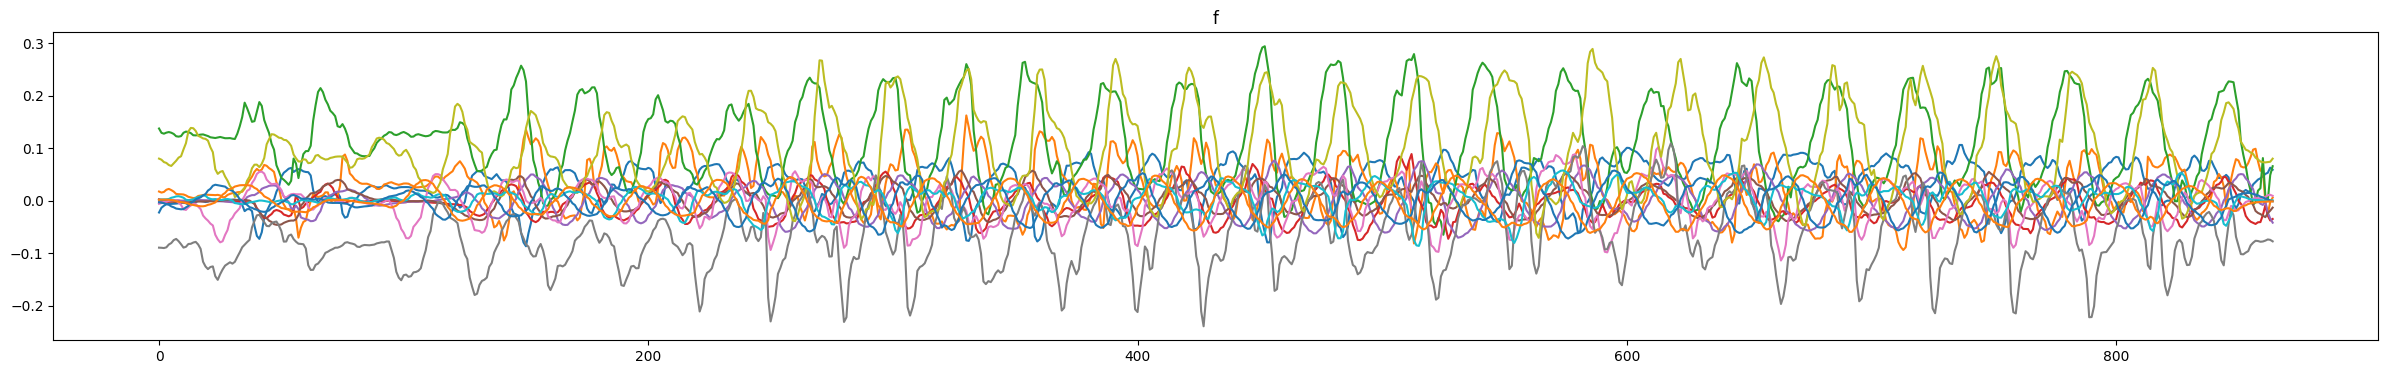

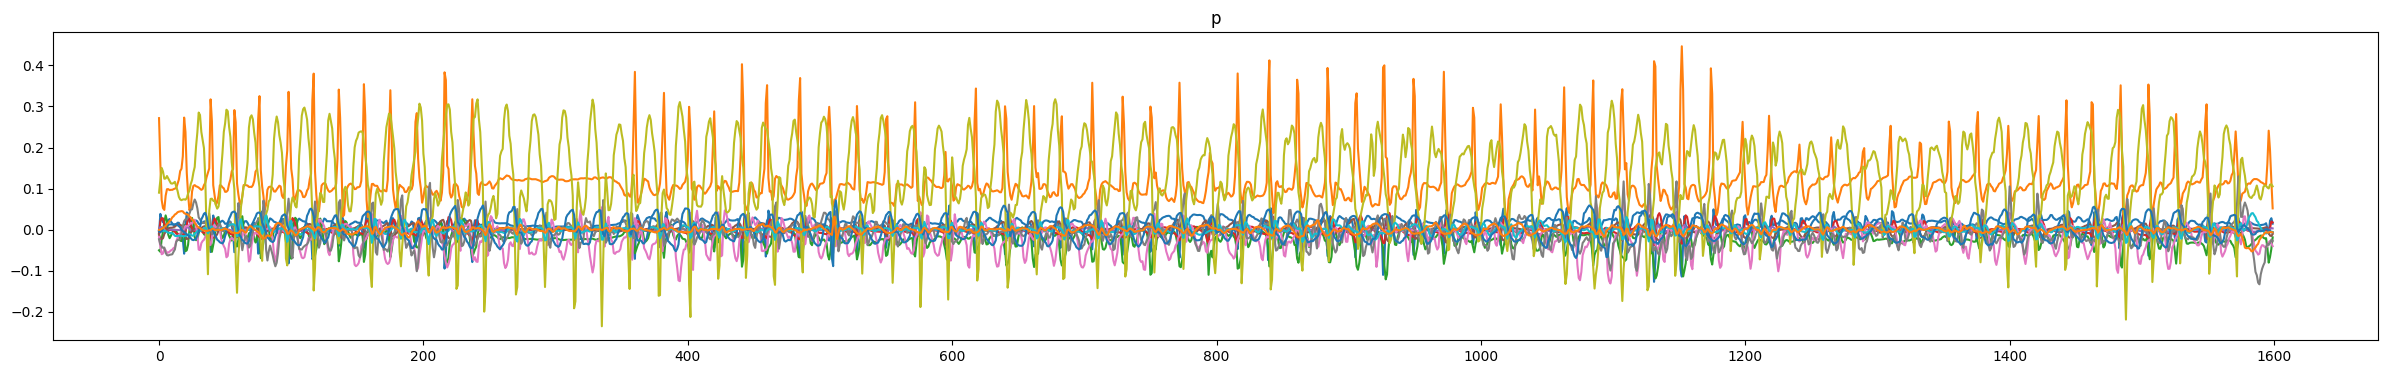

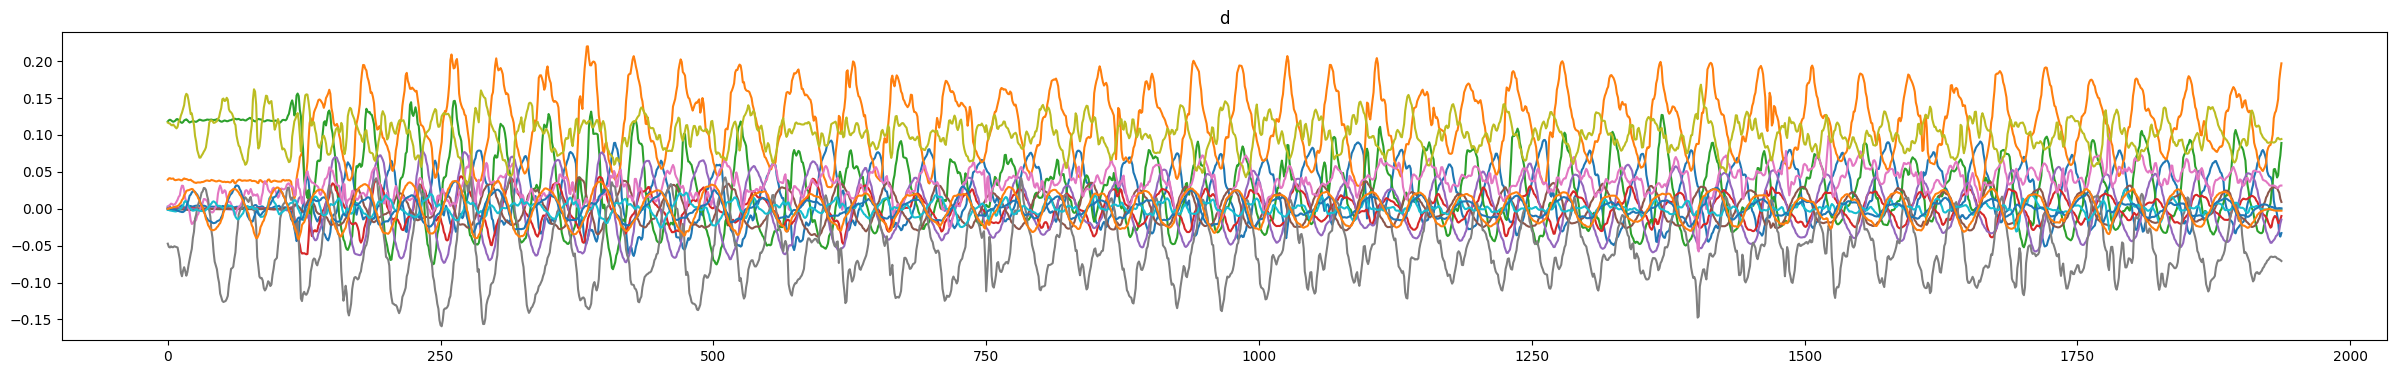

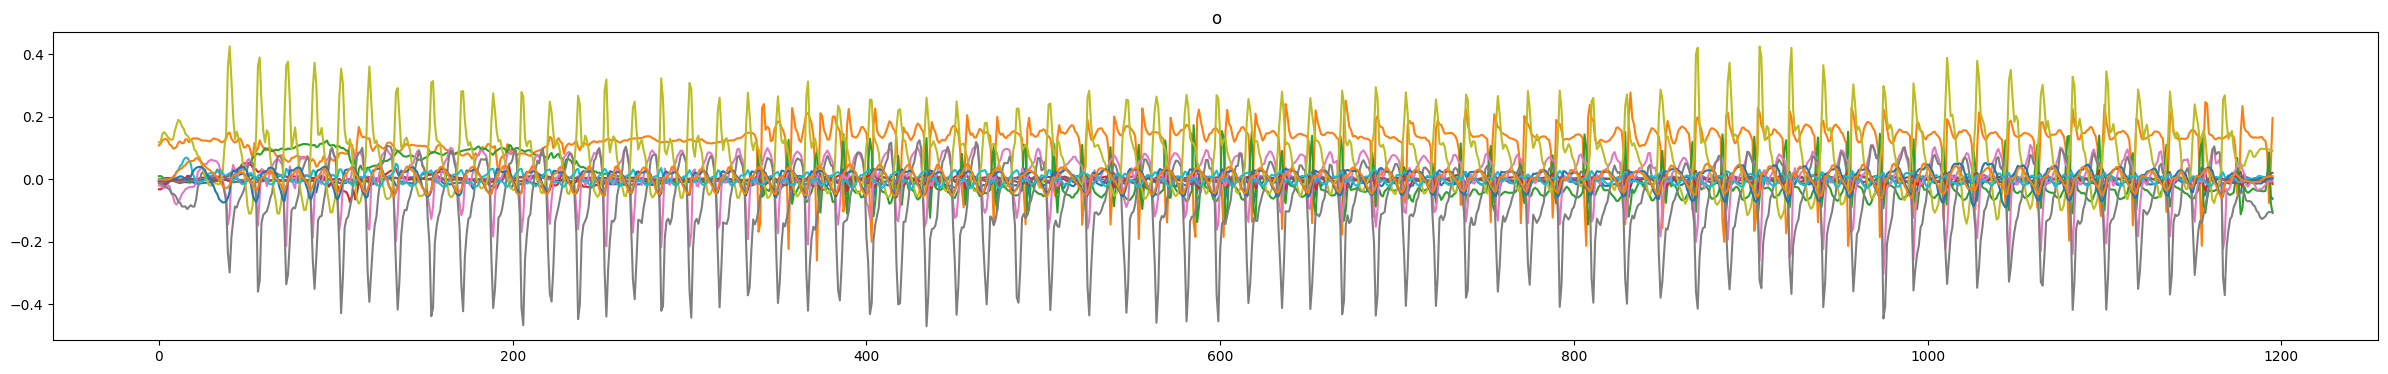

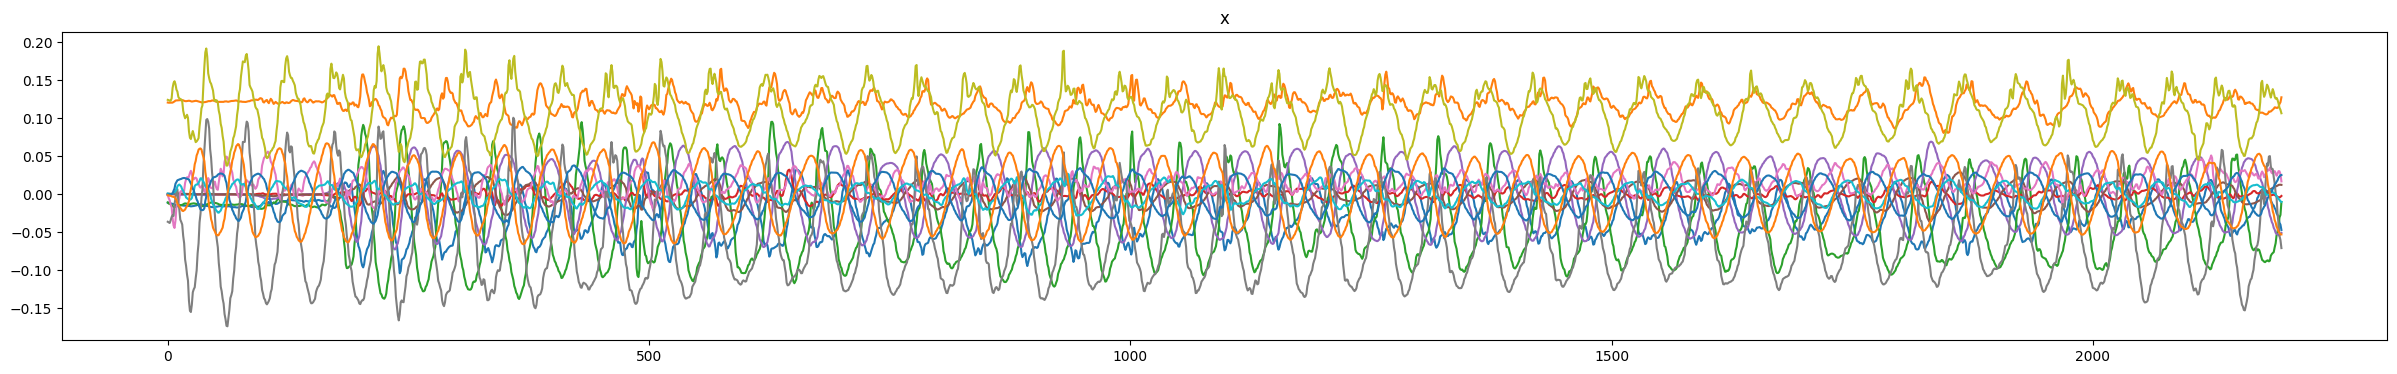

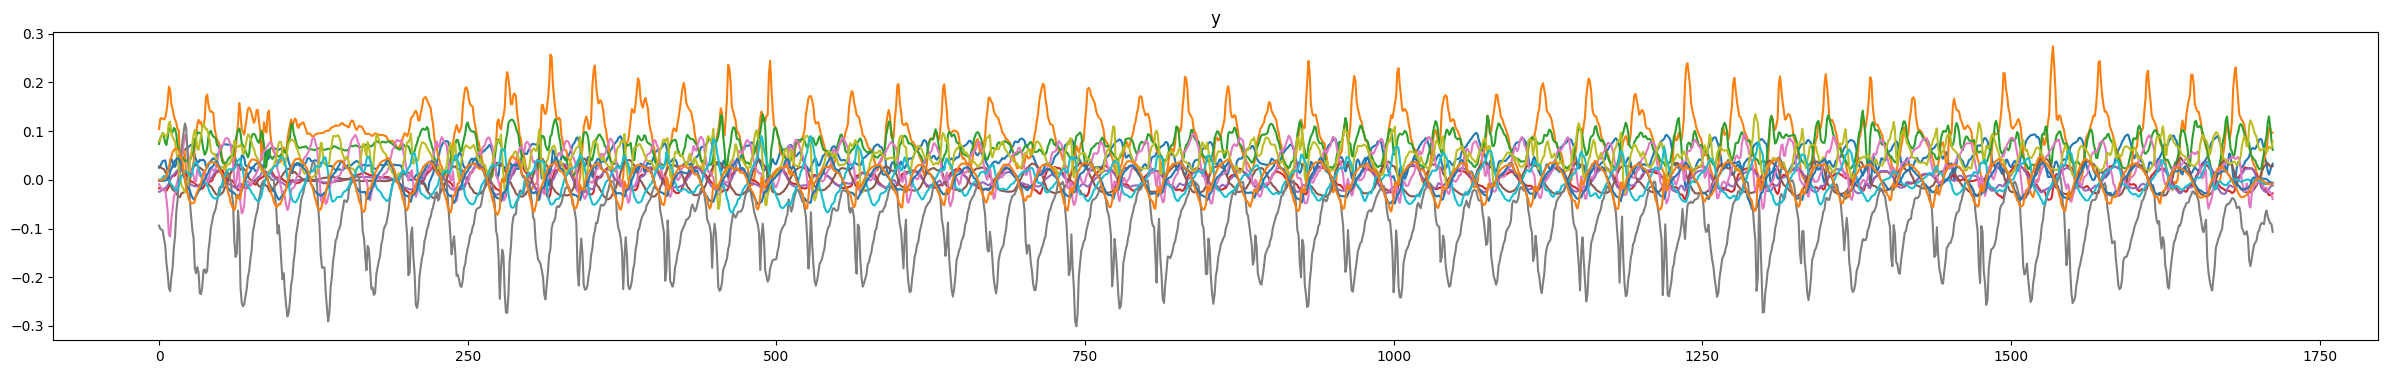

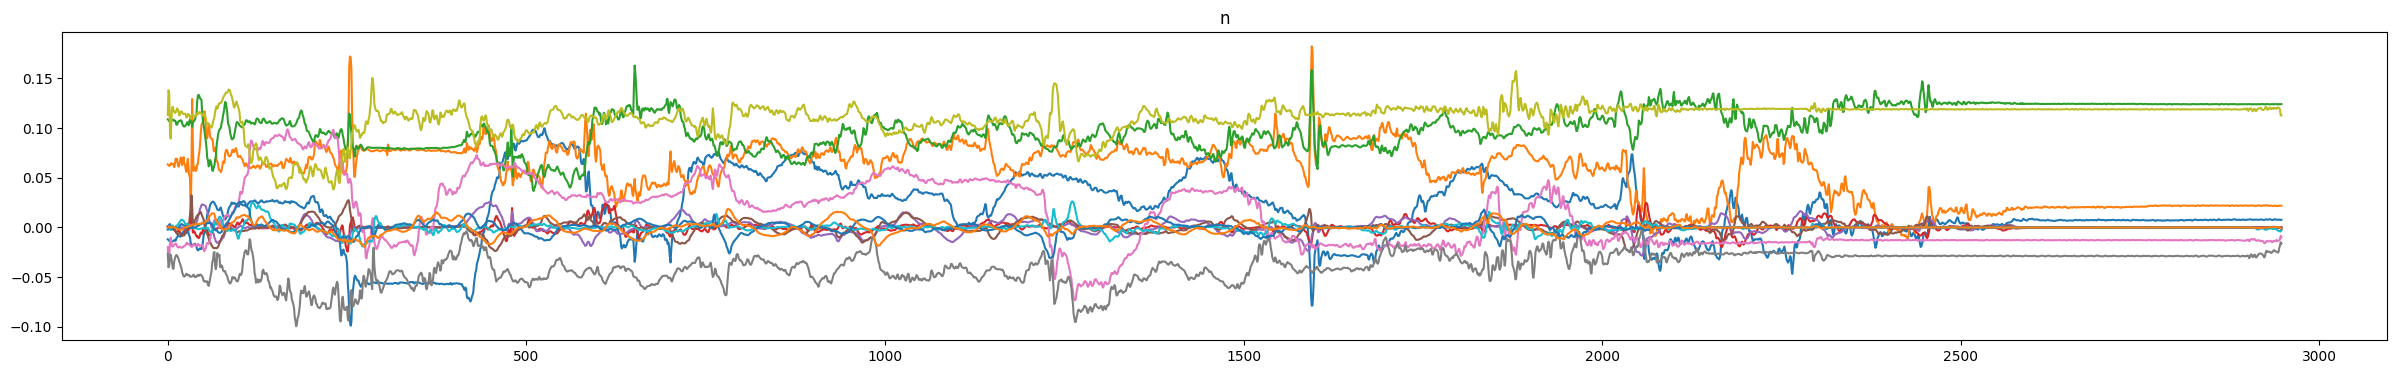

In [173]:
for gesture_name, df in data.items():
    plt.figure(figsize=(30, 4))  # 图表尺寸
    plt.title(gesture_name)      # 设置标题
    
    # 设置 ylim，放大 y 轴范围，突出数据细节
    # plt.ylim(-0.01, 0.01)        # 根据数据范围调整上下限
    
    # 如果需要放大 x 轴范围，可以设置 xlim，例如 plt.xlim(0, 200)
    plt.plot(df.values[:, :-1])  # 绘制所有列（除最后一列）
    plt.show()


In [174]:
# create windows of data, window size 50, overlap 49
window_size = 50
# window_size = 10
X = []
y = []
for gesture_name, df in data.items():   # item is used to return each key-value pair in the dictionary as a list of tuples
    df_values = df.values[:, :-1]
    label = gesture_name
    for i in range(0, len(df) - window_size, 1):
        X.append(df_values[i:i+window_size].flatten())
        y.append(label)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)


(15076, 600) (15076,)


### Training

In [175]:
# split data into train and test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)

(12060, 600) (3016, 600) (12060,) (3016,)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

### Evaluation

In [176]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred_rf = rf.predict(X_test)  # 预测标签
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

1.0
[[347   0   0   0   0   0   0   0   0]
 [  0 353   0   0   0   0   0   0   0]
 [  0   0 178   0   0   0   0   0   0]
 [  0   0   0 554   0   0   0   0   0]
 [  0   0   0   0 234   0   0   0   0]
 [  0   0   0   0   0 316   0   0   0]
 [  0   0   0   0   0   0 245   0   0]
 [  0   0   0   0   0   0   0 459   0]
 [  0   0   0   0   0   0   0   0 330]]


### Saving

In [177]:
# save the model
import pickle
import time

# make the model name based on the gesture names
run_timestamp = str(time.time()).replace(".", "-")
model_name = '_'.join(sorted(data.keys())) + "__" + run_timestamp

# make a model directory
model_dir = Path('./models')
model_dir.mkdir(parents=True, exist_ok=True)
with open(model_dir / f'rf_{model_name}.pkl', 'wb') as f:
    pickle.dump(rf, f)


In [178]:
print(model_name)

a_d_f_n_o_p_t_x_y__1741899264-312792
